# Automatic Gaussian Mixture Modeling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.75)
sns.set_style("white")

import random
np.random.seed(10)

Clustering is a foundational data analysis task, where members of the data set are sorted into groups or "clusters" according to measured similarities between the objects.

The Automatic Gaussian Mixture Model (AutoGMM) is a wrapper of [Sklearn's Gaussian Mixture class](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture). Different combinations of agglomeration, GMM, and cluster numbers are used in the algorithm, and the clustering with the best selection criterion, either Bayesian Information Criterion (BIC) or Akaike Information Criterion (AIC), is provided to the user.

Let's use AutoGMM on synthetic data and compare it to the existing Sklearn implementation.

## Using AutoGMM on Synthetic Data

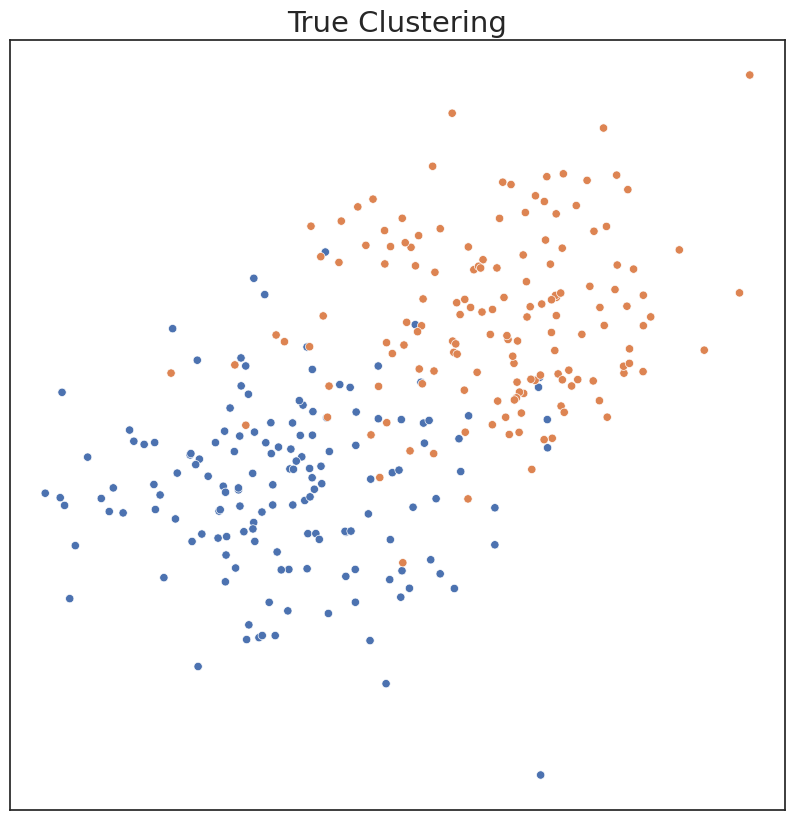

In [2]:
# Synthetic data

# Dim 1
class_1 = np.random.randn(150, 1)
class_2 = 2 + np.random.randn(150, 1)
dim_1 = np.vstack((class_1, class_2))

# Dim 2
class_1 = np.random.randn(150, 1)
class_2 = 2 + np.random.randn(150, 1)
dim_2 = np.vstack((class_1, class_2))

X = np.hstack((dim_1, dim_2))

# Labels
label_1 = np.zeros((150, 1))
label_2 = 1 + label_1

c = np.vstack((label_1, label_2)).reshape(300,)

# Plotting Function for Clustering
def plot(title, c_hat, X):
    plt.figure(figsize=(10, 10))
    n_components = int(np.max(c_hat) + 1)
    palette = sns.color_palette("deep")[:n_components]
    fig = sns.scatterplot(x=X[:,0], y=X[:,1], hue=c_hat, legend=None, palette=palette)
    fig.set(xticks=[], yticks=[], title=title)
    plt.show()

plot('True Clustering', c, X)

In the existing Sklearn implementation, one has to choose model parameters apriori, including the number of components. If parameters are input that don't match the data well, clustering performance can suffer. Performance can be measured by ARI, a metric ranging from 0 to 1. An ARI score of 1 indicates the estimated clusters are identical to the true clusters.

/opt/hostedtoolcache/Python/3.8.18/x64/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/runner/work/graspologic/graspologic/graspologic/models/edge_swaps.py:215: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  _edge_swap_numba = nb.jit(_edge_swap, nopython=False)


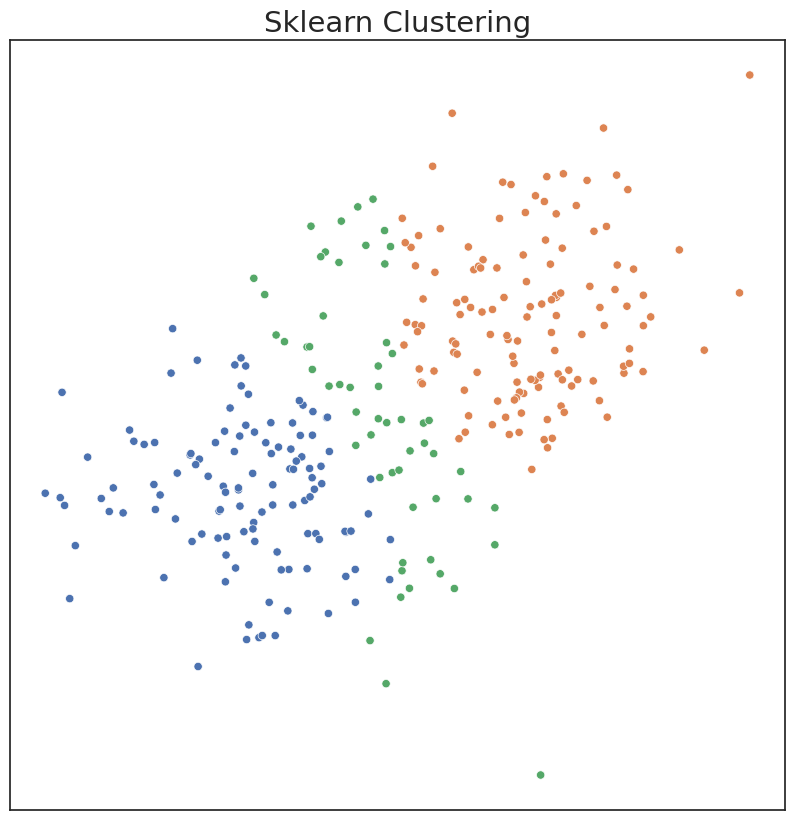

ARI Score for Model: 0.54


In [3]:
from sklearn import mixture
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import adjusted_rand_score

from graspologic.utils import remap_labels

# Say user provides inaccurate estimate of number of components
gmm_ = mixture.GaussianMixture(3)
c_hat_gmm = gmm_.fit_predict(X)

# Remap Predicted labels
c_hat_gmm = remap_labels(c, c_hat_gmm)

plot('Sklearn Clustering', c_hat_gmm, X)

# ARI Score
print("ARI Score for Model: %.2f" % adjusted_rand_score(c, c_hat_gmm))

Our method expands upon the existing Sklearn framework by allowing the user to automatically estimate the best hyperparameters for a Gaussian mixture model. In particular, the ideal `n_components_` is estimated by AutoGMM from a range of possible values given by the user. AutoGMM also sweeps over multiple covariance structures.

/opt/hostedtoolcache/Python/3.8.18/x64/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/hostedtoolcache/Python/3.8.18/x64/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/hostedtoolcache/Python/3.8.18/x64/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/hostedtoolcache/Python/3.8.18/x64/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/hostedtoolcache/Python/3.8.18/x64/lib/p

/opt/hostedtoolcache/Python/3.8.18/x64/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/hostedtoolcache/Python/3.8.18/x64/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/hostedtoolcache/Python/3.8.18/x64/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


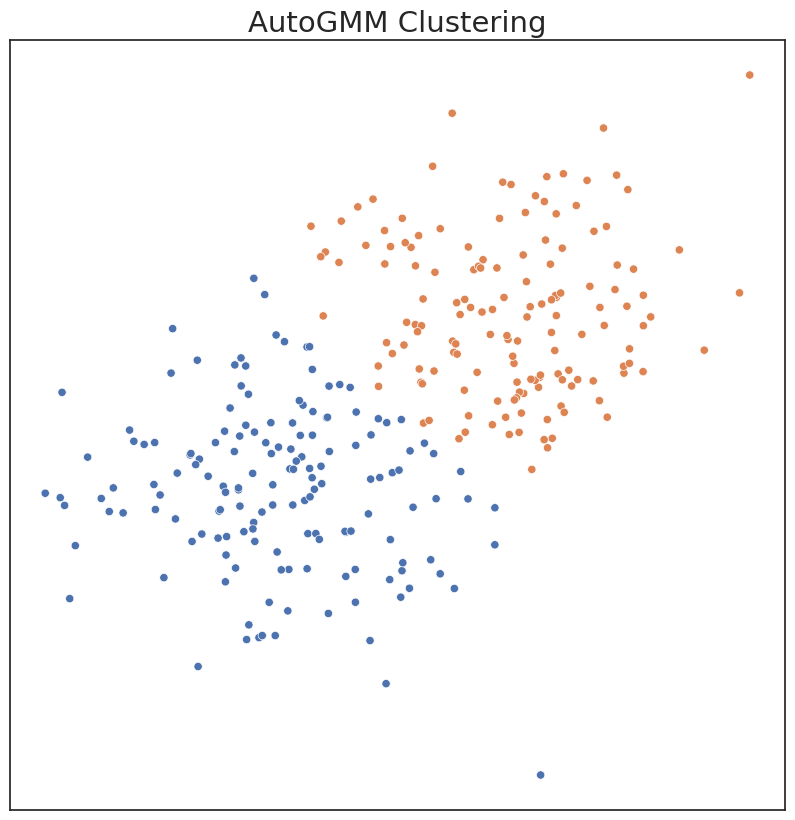

ARI Score for Model: 0.67


In [4]:
from graspologic.cluster.autogmm import AutoGMMCluster

# Fit AutoGMM model
autogmm_ = AutoGMMCluster(min_components=1, max_components=10)
c_hat_autogmm = autogmm_.fit_predict(X)

c_hat_autogmm = remap_labels(c, c_hat_autogmm)

plot('AutoGMM Clustering', c_hat_autogmm, X)

print("ARI Score for Model: %.2f" % adjusted_rand_score(c, c_hat_autogmm))